In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data_path = "H:\\LAI_prediction_2000to2020\\Merged_Data2002to2020NDVI.csv"
data = pd.read_csv(data_path)
print(data.columns)

# Preprocess data
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
print('Preprocess data finished!')


# Split into training and testing sets
train_data = data[data.index.year <= 2015]
test_data = data[data.index.year > 2015]
print('Split into training and testing sets finished!')


# Normalize data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)
print('Normalize data finished!')

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 0:2])  # GPP, LAI, NDVI columns
    return np.array(X), np.array(Y)

look_back = 1
X_train, y_train = create_dataset(train_data_normalized, look_back)
X_test, y_test = create_dataset(test_data_normalized, look_back)

# Create LSTM model
model = Sequential()
model.add(LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=4, verbose=2)

Index(['date', 'GPP', 'NDVI', 'LAI1', 'LAI2', 'LAI3',
       'dewpoint_2m_temperature', 'maximum_2m_air_temperature',
       'mean_2m_air_temperature', 'minimum_2m_air_temperature',
       'surface_pressure', 'total_precipitation', 'u_component_of_wind_10m',
       'v_component_of_wind_10m'],
      dtype='object')
Preprocess data finished!
Split into training and testing sets finished!
Normalize data finished!
Epoch 1/500
77/77 - 2s - loss: 0.1450 - 2s/epoch - 31ms/step
Epoch 2/500
77/77 - 0s - loss: 0.0463 - 201ms/epoch - 3ms/step
Epoch 3/500
77/77 - 0s - loss: 0.0412 - 211ms/epoch - 3ms/step
Epoch 4/500
77/77 - 0s - loss: 0.0365 - 190ms/epoch - 2ms/step
Epoch 5/500
77/77 - 0s - loss: 0.0332 - 220ms/epoch - 3ms/step
Epoch 6/500
77/77 - 0s - loss: 0.0308 - 221ms/epoch - 3ms/step
Epoch 7/500
77/77 - 0s - loss: 0.0295 - 209ms/epoch - 3ms/step
Epoch 8/500
77/77 - 0s - loss: 0.0289 - 186ms/epoch - 2ms/step
Epoch 9/500
77/77 - 0s - loss: 0.0280 - 164ms/epoch - 2ms/step
Epoch 10/500
77/77 - 

Epoch 123/500
77/77 - 0s - loss: 0.0243 - 182ms/epoch - 2ms/step
Epoch 124/500
77/77 - 0s - loss: 0.0237 - 168ms/epoch - 2ms/step
Epoch 125/500
77/77 - 0s - loss: 0.0237 - 205ms/epoch - 3ms/step
Epoch 126/500
77/77 - 0s - loss: 0.0240 - 202ms/epoch - 3ms/step
Epoch 127/500
77/77 - 0s - loss: 0.0238 - 194ms/epoch - 3ms/step
Epoch 128/500
77/77 - 0s - loss: 0.0240 - 195ms/epoch - 3ms/step
Epoch 129/500
77/77 - 0s - loss: 0.0237 - 198ms/epoch - 3ms/step
Epoch 130/500
77/77 - 0s - loss: 0.0237 - 204ms/epoch - 3ms/step
Epoch 131/500
77/77 - 0s - loss: 0.0239 - 228ms/epoch - 3ms/step
Epoch 132/500
77/77 - 0s - loss: 0.0238 - 195ms/epoch - 3ms/step
Epoch 133/500
77/77 - 0s - loss: 0.0236 - 180ms/epoch - 2ms/step
Epoch 134/500
77/77 - 0s - loss: 0.0238 - 186ms/epoch - 2ms/step
Epoch 135/500
77/77 - 0s - loss: 0.0237 - 158ms/epoch - 2ms/step
Epoch 136/500
77/77 - 0s - loss: 0.0236 - 148ms/epoch - 2ms/step
Epoch 137/500
77/77 - 0s - loss: 0.0237 - 186ms/epoch - 2ms/step
Epoch 138/500
77/77 - 0s 

77/77 - 0s - loss: 0.0234 - 243ms/epoch - 3ms/step
Epoch 250/500
77/77 - 0s - loss: 0.0233 - 186ms/epoch - 2ms/step
Epoch 251/500
77/77 - 0s - loss: 0.0234 - 164ms/epoch - 2ms/step
Epoch 252/500
77/77 - 0s - loss: 0.0237 - 141ms/epoch - 2ms/step
Epoch 253/500
77/77 - 0s - loss: 0.0233 - 150ms/epoch - 2ms/step
Epoch 254/500
77/77 - 0s - loss: 0.0231 - 145ms/epoch - 2ms/step
Epoch 255/500
77/77 - 0s - loss: 0.0233 - 178ms/epoch - 2ms/step
Epoch 256/500
77/77 - 0s - loss: 0.0233 - 188ms/epoch - 2ms/step
Epoch 257/500
77/77 - 0s - loss: 0.0233 - 160ms/epoch - 2ms/step
Epoch 258/500
77/77 - 0s - loss: 0.0232 - 152ms/epoch - 2ms/step
Epoch 259/500
77/77 - 0s - loss: 0.0234 - 180ms/epoch - 2ms/step
Epoch 260/500
77/77 - 0s - loss: 0.0233 - 161ms/epoch - 2ms/step
Epoch 261/500
77/77 - 0s - loss: 0.0232 - 176ms/epoch - 2ms/step
Epoch 262/500
77/77 - 0s - loss: 0.0234 - 155ms/epoch - 2ms/step
Epoch 263/500
77/77 - 0s - loss: 0.0232 - 168ms/epoch - 2ms/step
Epoch 264/500
77/77 - 0s - loss: 0.0236

Epoch 376/500
77/77 - 0s - loss: 0.0225 - 173ms/epoch - 2ms/step
Epoch 377/500
77/77 - 0s - loss: 0.0223 - 167ms/epoch - 2ms/step
Epoch 378/500
77/77 - 0s - loss: 0.0229 - 169ms/epoch - 2ms/step
Epoch 379/500
77/77 - 0s - loss: 0.0223 - 163ms/epoch - 2ms/step
Epoch 380/500
77/77 - 0s - loss: 0.0224 - 192ms/epoch - 2ms/step
Epoch 381/500
77/77 - 0s - loss: 0.0223 - 184ms/epoch - 2ms/step
Epoch 382/500
77/77 - 0s - loss: 0.0225 - 157ms/epoch - 2ms/step
Epoch 383/500
77/77 - 0s - loss: 0.0222 - 182ms/epoch - 2ms/step
Epoch 384/500
77/77 - 0s - loss: 0.0228 - 190ms/epoch - 2ms/step
Epoch 385/500
77/77 - 0s - loss: 0.0231 - 191ms/epoch - 2ms/step
Epoch 386/500
77/77 - 0s - loss: 0.0223 - 229ms/epoch - 3ms/step
Epoch 387/500
77/77 - 0s - loss: 0.0222 - 171ms/epoch - 2ms/step
Epoch 388/500
77/77 - 0s - loss: 0.0222 - 171ms/epoch - 2ms/step
Epoch 389/500
77/77 - 0s - loss: 0.0225 - 159ms/epoch - 2ms/step
Epoch 390/500
77/77 - 0s - loss: 0.0223 - 162ms/epoch - 2ms/step
Epoch 391/500
77/77 - 0s 

In [17]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [18]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict[:, 0:3]))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict[:, 0:3]))
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')

Train RMSE: 0.124
Test RMSE: 0.129


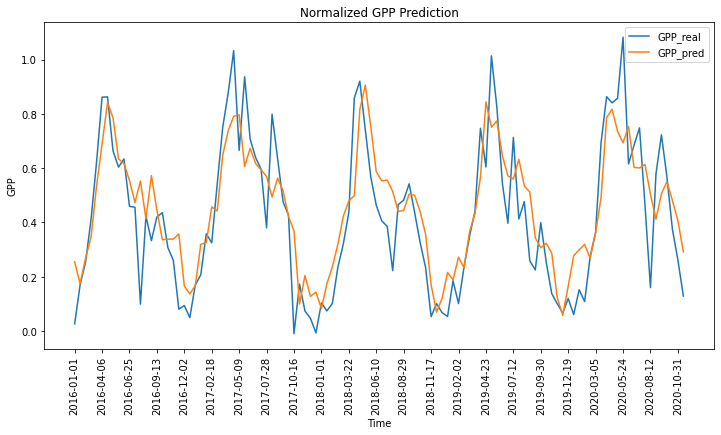

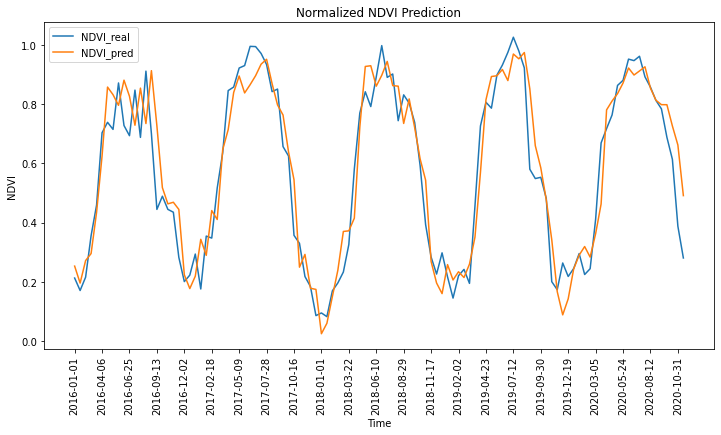

In [20]:
# Extract predicted and actual values for each variable
GPP_real, NDVI_real = y_test[:, 0], y_test[:, 1]
GPP_pred, NDVI_pred = test_predict[:, 0], test_predict[:, 1]


# Plot GPP
plt.figure(figsize=(12, 6))
plt.plot(GPP_real, label='GPP_real')
plt.plot(GPP_pred, label='GPP_pred')
plt.title('Normalized GPP Prediction')
plt.xlabel('Time')
plt.ylabel('GPP')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()

# Plot NDVI
plt.figure(figsize=(12, 6))
plt.plot(NDVI_real, label='NDVI_real')
plt.plot(NDVI_pred, label='NDVI_pred')
plt.title('Normalized NDVI Prediction')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.legend()
plt.show()

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data_path = "E:\\LAI_prediction_2000to2020\\Merged_Data2002to2020_no.csv"
data = pd.read_csv(data_path)
print(data.columns)

# Preprocess data
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
print('Preprocess data finished!')


# Split into training and testing sets
train_data = data[data.index.year <= 2015]
test_data = data[data.index.year > 2015]
print('Split into training and testing sets finished!')


# Normalize data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)
print('Normalize data finished!')

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 0:3])  # GPP, LAI, NDVI columns
    return np.array(X), np.array(Y)

look_back = 1
X_train, y_train = create_dataset(train_data_normalized, look_back)
X_test, y_test = create_dataset(test_data_normalized, look_back)

# Create LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=2)

Index(['date', 'GPP', 'LAI', 'NDVI', 'dewpoint_2m_temperature',
       'maximum_2m_air_temperature', 'mean_2m_air_temperature',
       'minimum_2m_air_temperature', 'surface_pressure', 'total_precipitation',
       'u_component_of_wind_10m', 'v_component_of_wind_10m'],
      dtype='object')
Preprocess data finished!
Split into training and testing sets finished!
Normalize data finished!
Epoch 1/100
77/77 - 4s - loss: 0.0944
Epoch 2/100
77/77 - 0s - loss: 0.0315
Epoch 3/100
77/77 - 0s - loss: 0.0268
Epoch 4/100
77/77 - 0s - loss: 0.0243
Epoch 5/100
77/77 - 0s - loss: 0.0227
Epoch 6/100
77/77 - 0s - loss: 0.0217
Epoch 7/100
77/77 - 0s - loss: 0.0212
Epoch 8/100
77/77 - 0s - loss: 0.0209
Epoch 9/100
77/77 - 0s - loss: 0.0208
Epoch 10/100
77/77 - 0s - loss: 0.0199
Epoch 11/100
77/77 - 0s - loss: 0.0195
Epoch 12/100
77/77 - 0s - loss: 0.0195
Epoch 13/100
77/77 - 0s - loss: 0.0197
Epoch 14/100
77/77 - 0s - loss: 0.0199
Epoch 15/100
77/77 - 0s - loss: 0.0194
Epoch 16/100
77/77 - 0s - loss: 0.

In [9]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict[:, 0:3]))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict[:, 0:3]))
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')

Train RMSE: 0.128
Test RMSE: 0.140


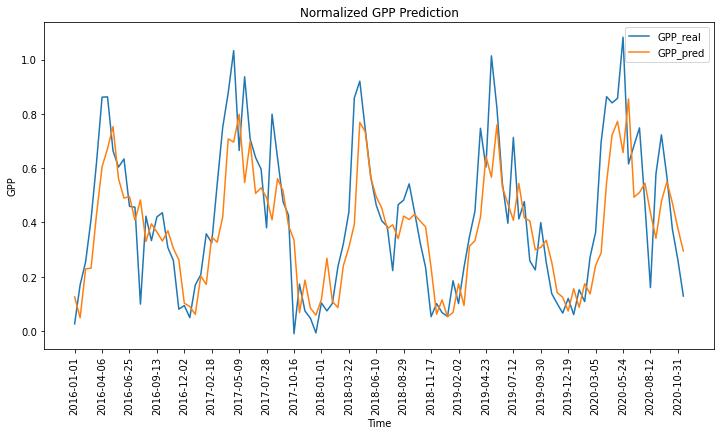

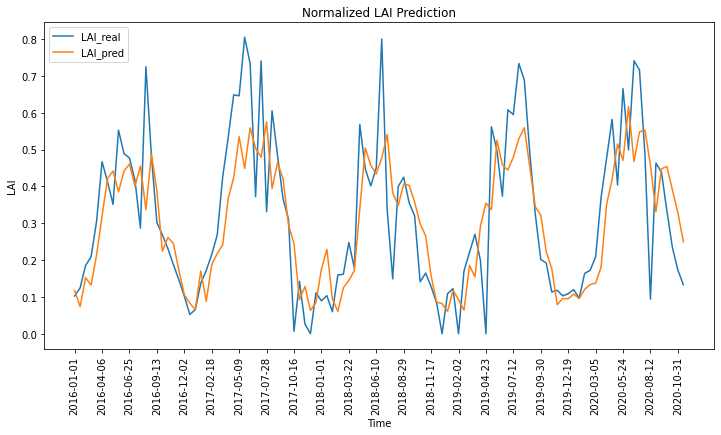

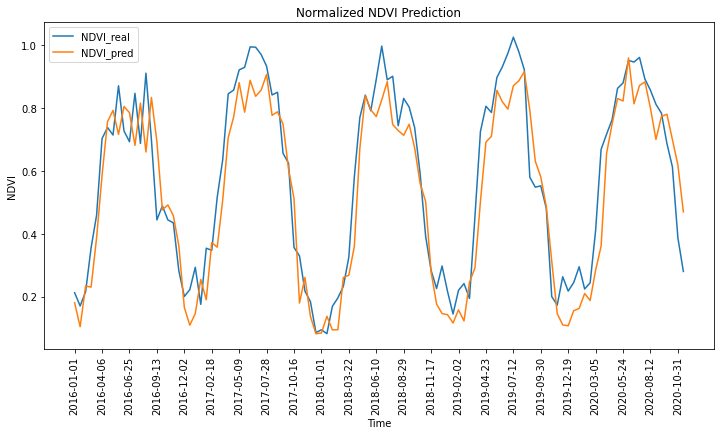

In [10]:
# Extract predicted and actual values for each variable
GPP_real, LAI_real, NDVI_real = y_test[:, 0], y_test[:, 1], y_test[:, 2]
GPP_pred, LAI_pred, NDVI_pred = test_predict[:, 0], test_predict[:, 1], test_predict[:, 2]


# Plot GPP
plt.figure(figsize=(12, 6))
plt.plot(GPP_real, label='GPP_real')
plt.plot(GPP_pred, label='GPP_pred')
plt.title('Normalized GPP Prediction')
plt.xlabel('Time')
plt.ylabel('GPP')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()

# Plot LAI
plt.figure(figsize=(12, 6))
plt.plot(LAI_real, label='LAI_real')
plt.plot(LAI_pred, label='LAI_pred')
plt.title('Normalized LAI Prediction')
plt.xlabel('Time')
plt.ylabel('LAI')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()

# Plot NDVI
plt.figure(figsize=(12, 6))
plt.plot(NDVI_real, label='NDVI_real')
plt.plot(NDVI_pred, label='NDVI_pred')
plt.title('Normalized NDVI Prediction')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (305,3) (11,) (305,3) 

In [80]:
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict_actual[:, 1:4]))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict_actual[:, 1:4]))
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')

Train RMSE: 3.059
Test RMSE: 3.570


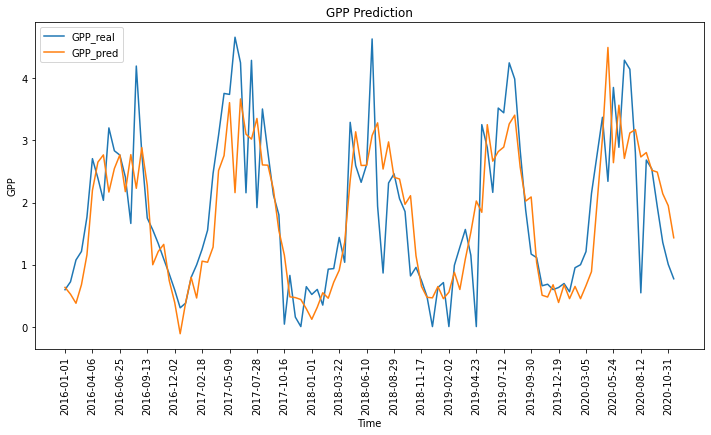

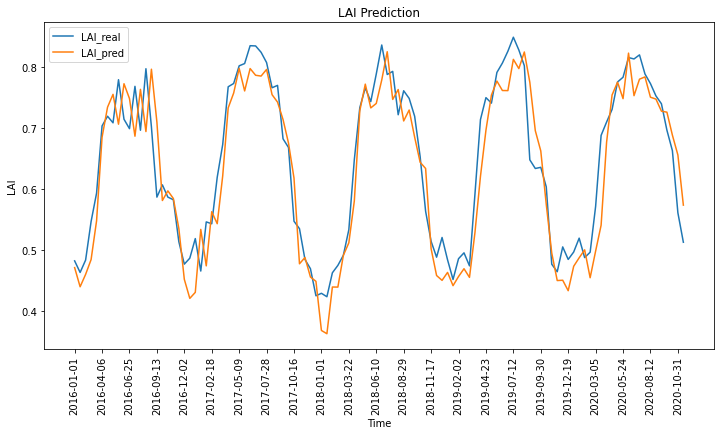

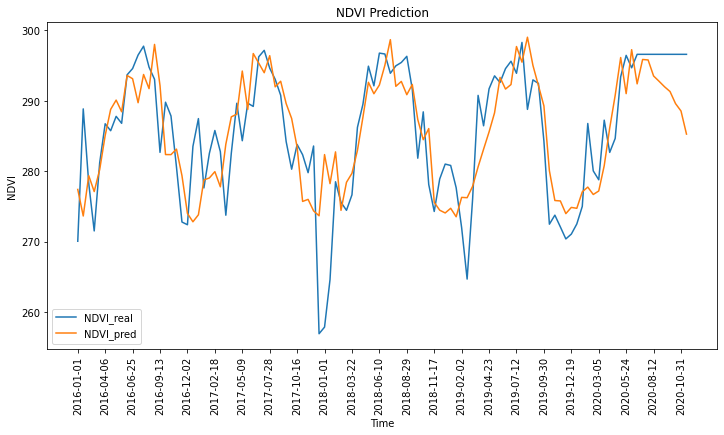

In [81]:
# Extract predicted and actual values for each variable
GPP_real, LAI_real, NDVI_real = y_test[:, 0], y_test[:, 1], y_test[:, 2]
GPP_pred, LAI_pred, NDVI_pred = test_predict[:, 0], test_predict[:, 1], test_predict[:, 2]


# Plot GPP
plt.figure(figsize=(12, 6))
plt.plot(GPP_real, label='GPP_real')
plt.plot(GPP_pred, label='GPP_pred')
plt.title('Normalized GPP Prediction')
plt.xlabel('Time')
plt.ylabel('GPP')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()

# Plot LAI
plt.figure(figsize=(12, 6))
plt.plot(LAI_real, label='LAI_real')
plt.plot(LAI_pred, label='LAI_pred')
plt.title('Normalized LAI Prediction')
plt.xlabel('Time')
plt.ylabel('LAI')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()

# Plot NDVI
plt.figure(figsize=(12, 6))
plt.plot(NDVI_real, label='NDVI_real')
plt.plot(NDVI_pred, label='NDVI_pred')
plt.title('Normalized NDVI Prediction')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.legend()
plt.show()